# CTSM Simulations at NEON Tower Sites -- Tutorial 

This is an introduction to running CLM at NEON tower sites.  It will guide you through the basics of running a simulation and provides basic visualization of the simulation results.  

**NOTE: Each step must be followed in order, otherwise you may encounter errors**


***
This tutorial uses Jupyter Notebook.

Interactive 

You will need to "run" cells using the play button in the menu above

You will see the results of the cells below

<h2> 1. Set up and run a simulation</h2>

In this tutorial, you will learn to run a CTSM model simulation for a NEON flux tower using meteorology observations from the tower. Many of the steps to run the model are condensed into a single function. If you would like to change any aspects of the model configuration, see [other tutorial] for additional instructions. <br>

NEON towers available for simulation include:
[List tower sites]

The tutorial is set to use the ABBY site. If you would like to run a simulation for a different tower, select the NEON tower from the above options and then change the 4-character site name in quotes below.

You will need to "run" the cell below. You can do this by clicking on the play button in the menu bar above. 

In [1]:
#Change the 4-character NEON site below.
site = 'ABBY'

The model will also need to download some data input files from the NEON data server, totaling approximately 127MB (what should this # be?) of size.

The command to create and run a NEON tower site simulation is given below, using the NEON tower site you selected above.  

The command runs a python script, run_neon.py

This script:
     - creates (create_newcase)
     - compiles (case.build)
     - runs (case.submit)
a simulation for the tower site you specified above for all years that tower meteorology data are available.

Note that this step downloads the input data required for the model simulation. It may take several minutes (should this be more specific?) to run, so please be patient. Many things will print to your screen. 

Run the cell to issue the command:

In [2]:
!/opt/ncar/cesm2/tools/site_and_regional/run_neon.py --neon-sites $site --output-root ~/CLM-NEON

Download finished successfully for listing.csv .
---- building a base case -------
base_case_name : ABBY
user_mods_dir  : /opt/ncar/cesm2/cime_config/usermods_dirs/NEON/ABBY
ERROR: Could not find a matching MPI for attributes: {'compiler': 'gnu', 'mpilib': 'mpich', 'threaded': False}


<br><br>The last few lines above should look like this:

>&nbsp;&nbsp;[text here]<br>
[more text here]<br>
[and even more!]


If so, great!  You've created and run CTSM for a NEON tower location. Your simulation should have produced data, which we'll look at next.


We'll cover more detail about setting up and modifying simulations in an upcoming tutorial, and additional information can also be found in CESM's online [documentation](https://escomp.github.io/CESM/release-cesm2/quickstart.html#create-a-case).
(Should we point to CTSM documentation here? Other tutorials? What else will people want to know)
<br><br>

***

If you would like to see additional and more advanced options for running NEON tower site simulations, many are listed in the script using the following command
Include some explanations (what is spinup, etc.)

In [3]:
!/opt/ncar/cesm2/tools/site_and_regional/run_neon.py --help

usage: run_neon.py [-h] [-d] [-v] [-s]
                   [--neon-sites {ABBY,BARR,BART,BLAN,BONA,CLBJ,CPER,DCFS,DEJU,DELA,DSNY,GRSM,GUAN,HARV,HEAL,JERC,JORN,KONA,KONZ,LAJA,LENO,MLBS,MOAB,NIWO,NOGP,OAES,ONAQ,ORNL,OSBS,PUUM,RMNP,SCBI,SERC,SJER,SOAP,SRER,STEI,STER,TALL,TEAK,TOOL,TREE,UKFS,UNDE,WOOD,WREF,YELL,all} [{ABBY,BARR,BART,BLAN,BONA,CLBJ,CPER,DCFS,DEJU,DELA,DSNY,GRSM,GUAN,HARV,HEAL,JERC,JORN,KONA,KONZ,LAJA,LENO,MLBS,MOAB,NIWO,NOGP,OAES,ONAQ,ORNL,OSBS,PUUM,RMNP,SCBI,SERC,SJER,SOAP,SRER,STEI,STER,TALL,TEAK,TOOL,TREE,UKFS,UNDE,WOOD,WREF,YELL,all} ...]]
                   [--base-case BASE_CASE_ROOT] [--output-root OUTPUT_ROOT]
                   [--overwrite] [--setup-only] [--rerun] [--no-batch]
                   [--run-type {ad,postad,transient,sasu}]
                   [--run-length RUN_LENGTH] [--start-date START_DATE]
                   [--end-date END_DATE] [--run-from-postad]

|------------------------------------------------------------------|
|---------------------  Instruc

________
<h2> 2. Analyze and visualize the output </h2>

Now that your simulation completed, let's take a quick look at the data. 

Visualization in Jupyter Notebooks is a huge topic, and there are countless ways of analyzing and processing model data. Since this is a "quickstart" tutorial, we're going to use matplotlib for some simple visualizations. 

More advanced visualizations are available in other tutorial lessons.



If you are interested in exploring the available data, you can find it here:

In [4]:
!ls ~/archive/ABBY.transient/lnd/hist/*2018*.nc |head -20


/home/user/archive/ABBY.transient/lnd/hist/ABBY.transient.clm2.h0.2018-01.nc
/home/user/archive/ABBY.transient/lnd/hist/ABBY.transient.clm2.h0.2018-02.nc
/home/user/archive/ABBY.transient/lnd/hist/ABBY.transient.clm2.h0.2018-03.nc
/home/user/archive/ABBY.transient/lnd/hist/ABBY.transient.clm2.h0.2018-04.nc
/home/user/archive/ABBY.transient/lnd/hist/ABBY.transient.clm2.h0.2018-05.nc
/home/user/archive/ABBY.transient/lnd/hist/ABBY.transient.clm2.h0.2018-06.nc
/home/user/archive/ABBY.transient/lnd/hist/ABBY.transient.clm2.h0.2018-07.nc
/home/user/archive/ABBY.transient/lnd/hist/ABBY.transient.clm2.h0.2018-08.nc
/home/user/archive/ABBY.transient/lnd/hist/ABBY.transient.clm2.h0.2018-09.nc
/home/user/archive/ABBY.transient/lnd/hist/ABBY.transient.clm2.h0.2018-10.nc
/home/user/archive/ABBY.transient/lnd/hist/ABBY.transient.clm2.h0.2018-11.nc
/home/user/archive/ABBY.transient/lnd/hist/ABBY.transient.clm2.h0.2018-12.nc
/home/user/archive/ABBY.transient/lnd/hist/ABBY.transient.clm2.h1.2018-01-01

****
The simulation files listed are listed above. 

Here, you can see the listed files comprised of the file path and file names.

The files are named by simulation name, date, and neon site. 
These files are in netcdf format (denoted with `.nc` file extension). 
Netcdf (network Common Data Form) is a file format for storing and sharing multi-dimensional scientific variables.
Netcdf files are platform independent and self-describing; which means each file has metadata in that describes the data it contains. 

A Netcdf file has **variables**, **dimensions**, and **attributes**.


The figure below provides an example of data strucutre in a netcdf file. For example, this dataset has two variables (temperature and pericipation) stored in three-dimensional variables. It also has three dimensions (x, y, and time) which are one dimensional coordinates. It also includes two-dimensional coordinates (latitude and longitude). 

![Netcdf](https://gdfa.ugr.es/python/climate_data/img/xarray2.png)


Here for our neon simulations, we have `*h0*` files that are ******** and include the following variables, while the `*h1*` variables are *** and include the following variables: ****
****


****
Before any visualization and analysis, we should first read and pre-process the data.

## Step1) Data Pre-processing:

__Import the required libraries for this analy:__

In [5]:
## TODO: clean up imports
#Import Libraries
%matplotlib inline

import os
import sys
import glob
import time
import argparse
import requests

import numpy as np
import pandas as pd
import xarray as xr


from glob import glob
from os.path import join, expanduser

import matplotlib
import matplotlib.pyplot as plt

from scipy import stats


Next, identify the year of interest for making the plots:

In [7]:
year = "2018"
neon_site = site

### 1-1) Load CLM simulation files:

First, we have to load the CLM simulation files that we created above for our neon site. 

For reading the netCDF files, we are using the `xarray` Python package. To learn more about `xarray` please check [their website](http://xarray.pydata.org/en/stable/).

Change `sim_path` to point to your local directory where you've stored simulation (CLM) files.

In [8]:
sim_path = "/home/user/archive/"+neon_site+".transient/lnd/hist/"
year = "2018"
sim_files = sorted(glob(join(sim_path,neon_site+".transient.clm2.h1."+year+"*.nc")))

print("All Simulation files: [", len(sim_files), "files]")
#print(*sim_files,sep='\n')

All Simulation files: [ 365 files]


Now, let's open up these files using `xarray.open_mfdataset` function, which opens up multiple netcdf files as a single xarray dataset. 

For more information on this function, check this  [link](
http://xarray.pydata.org/en/stable/generated/xarray.open_mfdataset.html).

__WARNING__: Reading all the files might take a few minutes.

In [9]:
start = time.time()

ds_ctsm = xr.open_mfdataset(sim_files, decode_times=True, combine='by_coords',parallel=True)

end = time.time()
print("Reading all simulation files took:", end-start, "s.")


Reading all simulation files took: 97.29235982894897 s.


Now, let's check what is inside xarray dataset that we created from the simulation files:

In [11]:
ds_ctsm

Here you can click on `Data Variables`, `Attributes`, `Deminsions`, and `coordinates` to expand and see the details. 

If you click on `Data Variables`, it lists all the available variables and you can also click on the variables to see the description of the variable (`long_name`) and `units` and other information on each of the variables.

**Question 1)** What are the avaibale variables in the dataset created by opening simulation files?

**Question 2)** What is the `long_name` and `unit` of variable `FSH` and `GPP`?

**Tip**: Xarray has built-in plotting, similar to Pandas. For quick inspection of a variable, we can use `.plot()` to visualize it. Here Let's take a look at Gross Primary Production (`GPP`) variable  and make a quick plot:

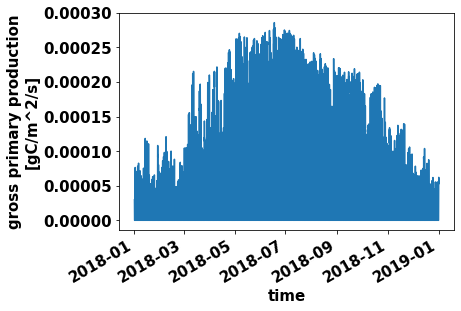

In [15]:
ds_ctsm['GPP'].plot()

In [16]:
#what we want from these files Not all the above...
plot_vars = ['TBOT','FSH','GPP','AR','HR','FCEV', 'FCTR', 'FGEV','FSA','FIRA']

In [17]:
df_ctsm = pd.DataFrame({'time':ds_ctsm.time})

for var in plot_vars:
    field = np.ravel ( ds_ctsm[var])     
    df_ctsm[var]=field


________________________________

### 1-2) Load observation files from neon 
For evaluating the performance of our CLM simulation, we should compare it against some observations. Here we are going to use neon data (evaluation data) to analyze the performance of our simulation. 

For this, we should first download the neon evaluation data for our site. The following script will help you to automatically download the neon evaluation files for the neon site and year of interest.

In [ ]:
eval_dir = "/home/user/evaluation_files/"

download_eval_files(neon_site, eval_dir)

Now that you downloaded the neon evaluation files, let's take a look a them:

In [20]:
eval_path = os.path.join('/home/user/evaluation_files/',neon_site)

eval_files = sorted(glob(join(eval_path,neon_site+"_eval_"+year+"*.nc")))

print("All Observation files:")
print(*eval_files,sep='\n')

All Observation files:
/home/user/evaluation_files/ABBY/ABBY_eval_2018-01.nc
/home/user/evaluation_files/ABBY/ABBY_eval_2018-02.nc
/home/user/evaluation_files/ABBY/ABBY_eval_2018-03.nc
/home/user/evaluation_files/ABBY/ABBY_eval_2018-04.nc
/home/user/evaluation_files/ABBY/ABBY_eval_2018-05.nc
/home/user/evaluation_files/ABBY/ABBY_eval_2018-06.nc
/home/user/evaluation_files/ABBY/ABBY_eval_2018-07.nc
/home/user/evaluation_files/ABBY/ABBY_eval_2018-08.nc
/home/user/evaluation_files/ABBY/ABBY_eval_2018-09.nc
/home/user/evaluation_files/ABBY/ABBY_eval_2018-10.nc
/home/user/evaluation_files/ABBY/ABBY_eval_2018-11.nc
/home/user/evaluation_files/ABBY/ABBY_eval_2018-12.nc


Now, similar to the simulation files, let's open up the evaluation files using `xarray.open_mfdataset` function:

In [21]:
start = time.time()

ds_eval = xr.open_mfdataset(eval_files, decode_times=True, combine='by_coords')

end = time.time()
print("Reading all observation files took:", end-start, "s.")

Reading all observation files took: 0.27484703063964844 s.


Let's check what is inside this xarray dataset that we created from the evaluation files. Similar to the above, you can click on the cell output to see the details of the variables, coordinates, and attribtues:

In [22]:
ds_eval

You can use `.plot()` for quickly inspect and visualize a variable. Here let's take a look at Net Radiation `Rnet` variable and make a quick plot:

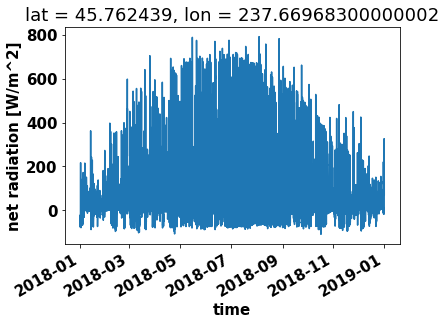

In [24]:
ds_eval['Rnet'].plot()

In [25]:
#what we want from these files not all the above...
eval_vars = ['NEE','FSH','EFLX_LH_TOT','GPP']

Convert to a Pandas Dataframe for easier handling:

In [26]:
df_eval = pd.DataFrame({'time':ds_eval.time})

for var in eval_vars:
    field = np.ravel ( ds_eval[var])     
    df_eval[var]=field

__________
So far we read and created a dataframes that contains evaluation files (`df_eval`) and model ouput (`df_ctsm`).

Now Let's merge Observation and Simulation Data for easier handling:

In [27]:
#-- extract year, month, day, hour information from time
df_eval['year'] = df_eval['time'].dt.year
df_eval['month'] = df_eval['time'].dt.month
df_eval['day'] = df_eval['time'].dt.day
df_eval['hour'] = df_eval['time'].dt.hour

#-- make df_all that includes both obs and sim
df_all = df_eval

plot_vars = ['TBOT','FSH','GPP','AR','HR','FCEV', 'FCTR', 'FGEV','FSA','FIRA']

#-- add simulation data to df_all:
for var in plot_vars:
    sim_var_name = "sim_"+var
    #-- shift simulation data by one
    df_all[sim_var_name]=df_ctsm[var].shift(-1).values

In this tutorial, we are going to focus on making visualization for **latent heat flux**. But you can also use these scripts for analyzing other available variables. 

## What is latent heat flux?

Latent heat flux is the energy for water evaporation from the ecosystem. It is measured by NEON towers and is also simulated by CLM. Here we are going to explore how well CLM simulates the observed tower data.

Latent heat flux is a combination of plant transpiration, evaporation from leaf surfaces (e.g., from dew, after precipitation events), and evaporation from the soil. 

NEON towers cannot distinguish how much each of these processes contributes to latent heat flux, but CLM simulations can help us to disentangle this. 

Not all the observation variables are in the CLM history output files. But we can calculate them from their components. 

For example, we can calulate the latenet heat flux as the sum of of plant transpiration, canopy evaporation, and ground evaporation. 

$$ Latent Heat Flux = FCEV +FCTR +FGEV $$

$FCEV$ : Canopy evaporation in W/m^2

$FCTR$ : Canopy transpiration in W/m^2

$FGEV$ : Ground evaporation in W/m^2


In [28]:
clm_var = 'sim_EFLX_LH_TOT'

#EFLX_LH_TOT = FCEV + FCTR +FGEV
df_all [clm_var] = df_ctsm['FCEV'].shift(-1).values \
                 + df_ctsm['FCTR'].shift(-1).values \
                 + df_ctsm['FGEV'].shift(-1).values

# Simple Visualization

Let's create a time-series plot that compares daily average latent heat flux from observation (neon) and simulations. 

But first, we should calculate the daily average. 

In [29]:
df_daily = df_all.groupby(['year','month','day']).mean().reset_index()
df_daily['time']=pd.to_datetime(df_daily[["year", "month", "day"]])

In [30]:
plot_var = 'EFLX_LH_TOT'
sim_var = 'sim_'+plot_var

plot_var_desc = "Latent Heat Flux"
plot_var_unit= "Wm-2"

Now, that we calculate the daily average we can easily create the plots using Python matplotlib package:

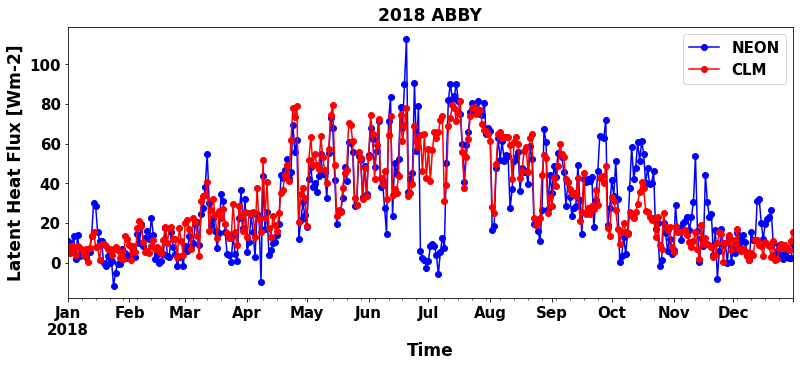

<Figure size 432x288 with 0 Axes>

In [31]:
plt.figure(num=None, figsize=(13, 5),  facecolor='w', edgecolor='k')
        
ax = plt.gca()
df_daily.plot ( x= 'time', y = plot_var , marker = 'o' ,ax =ax , color = 'b',label="NEON")
df_daily.plot ( x= 'time', y = 'sim_'+plot_var , marker = 'o' ,ax =ax , color = 'r',label="CLM")

plt.xlabel('Time', fontsize=17)
plt.ylabel(plot_var_desc+" ["+plot_var_unit+"]", fontsize=17)
plt.title(year+" "+neon_site, fontweight='bold',fontsize=17)
plt.show()
plt.savefig("2018_ABBY_TSeries_Daily_Ave_V2.png")

Now, let's add the daily standard deviation as a shaded area on top:

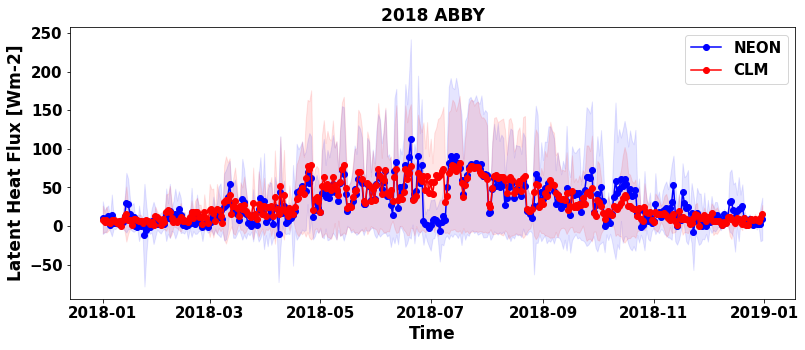

<Figure size 432x288 with 0 Axes>

In [32]:
df_daily_std = df_all.groupby(['year','month','day']).std().reset_index()
df_daily_std['time'] = pd.to_datetime(df_daily_std[["year", "month", "day"]])

plt.figure(num=None, figsize=(13, 5),  facecolor='w', edgecolor='k')

plt.plot ( df_daily.time, df_daily[plot_var], marker = 'o' , color = 'b',label="NEON")
plt.plot ( df_daily.time, df_daily[sim_var], marker = 'o' , color = 'r',label="CLM")

plt.fill_between(df_daily.time, df_daily.EFLX_LH_TOT-df_daily_std.EFLX_LH_TOT, df_daily.EFLX_LH_TOT+df_daily_std.EFLX_LH_TOT ,alpha=0.1, color = 'b')
plt.fill_between(df_daily.time, df_daily.sim_EFLX_LH_TOT-df_daily_std.sim_EFLX_LH_TOT, df_daily.sim_EFLX_LH_TOT+df_daily_std.sim_EFLX_LH_TOT ,alpha=0.1, color = 'r')

plt.legend()
plt.xlabel('Time', fontsize=17)
plt.ylabel(plot_var_desc+" ["+plot_var_unit+"]", fontsize=17)
plt.title(year+" "+neon_site, fontweight='bold',fontsize=17)
plt.show()
plt.savefig("2018_ABBY_TSeriesShaded_Daily_Ave_V2.png")

We can see that there are areas where CLM under-predicts or over-predicts the NEON observation data.

**Question) At your site of interest, when does CLM shows the best and worst performance in predicting Latent Heat Flux ?**

*****

Now we can take a look at the components of As we mentioned above the componenets of the fluxes are not available in the neon dataset. 

But we can find the components from the CLM simulation data. Therefore, we can find out how different components of Latent Heat Flux is contributing to the total over time. 

For this, let's look at the monthly average data:

In [33]:
df_monthly = df_all.groupby(['year','month']).mean().reset_index()
df_monthly["day"]=15
df_monthly['time']=pd.to_datetime(df_monthly[["year", "month","day"]])


Now let's make a barplot showing components of Latent Heat Flux over different months:


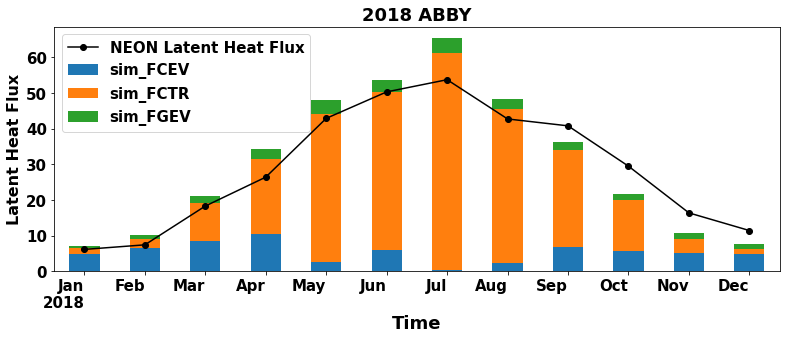

In [34]:
def line_format(label):
    """
    Helper function to convert time label to the format of pandas line plot
    """
    month = label.month_name()[:3]
    if month == 'Jan':
        month += f'\n{label.year}'
    return month


plt.figure(num=None, figsize=(13, 5),  facecolor='w', edgecolor='k')
        
ax = plt.gca()

df_monthly.plot ( x= 'time', y = 'EFLX_LH_TOT' , marker = 'o' ,ax =ax , color = 'black',label="NEON Latent Heat Flux",use_index=False)
df_monthly[['time','sim_FCEV','sim_FCTR','sim_FGEV']].plot.bar ( x= 'time',stacked='True',ax=ax,rot=0)

ax.set_xticklabels(map(line_format, df_monthly.time))

plt.xlabel('Time', fontsize=18)
plt.ylabel('Latent Heat Flux', fontsize=16)
        
plt.title(year+" "+neon_site, fontweight='bold')
plt.show()

Here we are showing the observation (NEON) Latent Heat Flux over the barplot.

**Question) For each month, what does the total bar length show in this plot?**

**Question) For your neon site, when does the Canopy Transpiration (FCTV) is the highest contributor to the total CLM latent heat flux?**

**Question) During which months, Canopy Evaporation (FCEV) is the lowest contributor to the total CLM latent heat flux?**


For checking how contrbitutions of each component of Latent Heat Flux changes over different months, let's look at a more advanced plot with two y axis. 

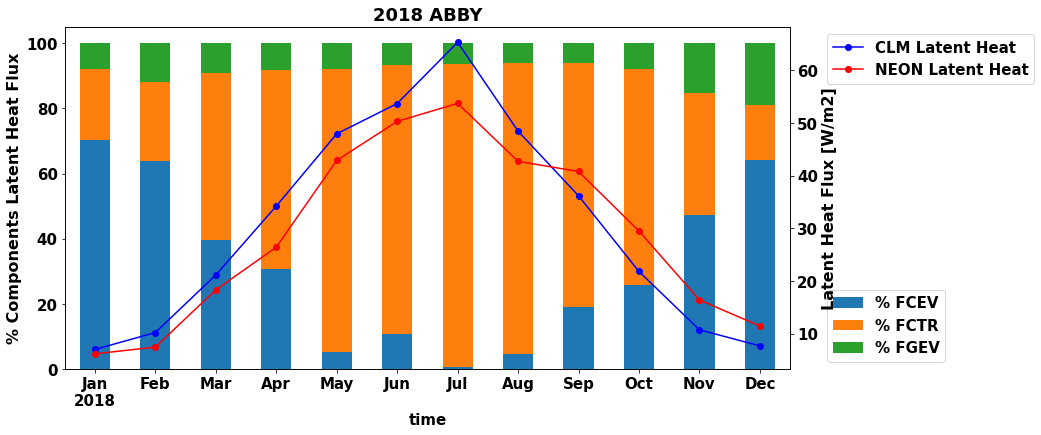

In [35]:
df_monthly ['sim_FCEV_perc']= df_monthly ['sim_FCEV']/(df_monthly ['sim_FCEV']+df_monthly ['sim_FCTR']+df_monthly ['sim_FGEV'])*100
df_monthly ['sim_FCTR_perc']= df_monthly ['sim_FCTR']/(df_monthly ['sim_FCEV']+df_monthly ['sim_FCTR']+df_monthly ['sim_FGEV'])*100
df_monthly ['sim_FGEV_perc']= df_monthly ['sim_FGEV']/(df_monthly ['sim_FCEV']+df_monthly ['sim_FCTR']+df_monthly ['sim_FGEV'])*100

plt.figure(num=None, figsize=(13, 7),  facecolor='w', edgecolor='k')
        
ax = plt.gca()

#df_monthly.plot ( x= 'time', y = 'EFLX_LH_TOT' , marker = 'o' ,ax =ax , color = 'black',label="NEON EFLX_LH_TOT",use_index=False)
df_monthly[['time','sim_FCEV_perc','sim_FCTR_perc','sim_FGEV_perc']].plot.bar ( x= 'time',stacked='True',ax=ax,rot=0)

ax.set_xticklabels(map(line_format, df_monthly.time))
ax.set_ylabel('% Components Latent Heat Flux', fontsize=16)
ax.legend(bbox_to_anchor=(1.04,0), loc="lower left",labels=["% FCEV","% FCTR","% FGEV"])
ax2 = ax.twinx()
df_monthly.plot ( x= 'time', y = 'sim_EFLX_LH_TOT' , marker = 'o' ,ax =ax2 , color = 'b',label="CLM Latent Heat",use_index=False)
df_monthly.plot ( x= 'time', y = 'EFLX_LH_TOT' , marker = 'o' ,ax =ax2 , color = 'r',label="NEON Latent Heat",use_index=False)

plt.ylabel('Latent Heat Flux [W/m2]', fontsize=16)
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

plt.title(year+" "+neon_site, fontweight='bold')
plt.show()

______________

For better understanding and describing the performance of CLM simulation and compare it with NEON observation, we can also utilize scatter plots.

First, let's define a generic function that plot scatter diagrams and add a regression line on top of it. 

In [36]:
def detailed_scatter (x, y, color):
    plt.scatter (x,y, marker="o",color = color)
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    line = slope*x+intercept
    plt.plot(x,line,'black', label='y={:.2f}x+{:.2f}'.format(slope,intercept)+" (R2="+"{:.2f}".format(r_value)+")")
    plt.legend(fontsize=13)

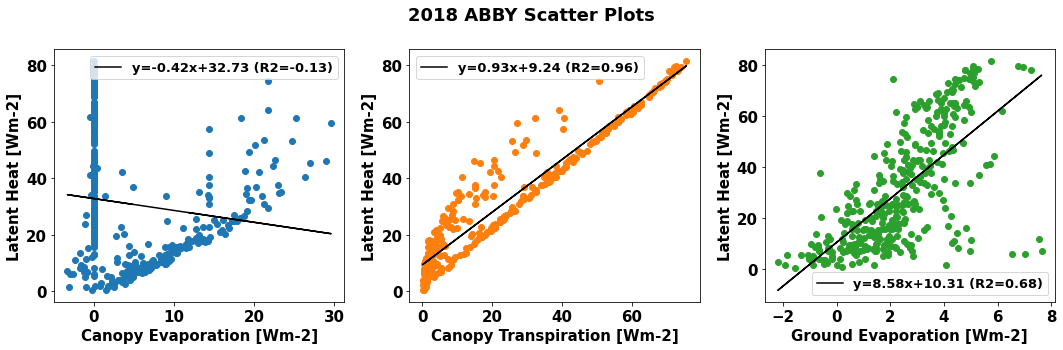

In [38]:
plt.figure(num=None, figsize=(15, 5),  facecolor='w', edgecolor='k')

plt.subplot(1, 3, 1)
detailed_scatter (df_daily.sim_FCEV, df_daily.sim_EFLX_LH_TOT, '#1f77b4')
plt.ylabel('Latent Heat [Wm-2]')
plt.xlabel('Canopy Evaporation [Wm-2]')

plt.subplot(1, 3, 2)
detailed_scatter (df_daily.sim_FCTR, df_daily.sim_EFLX_LH_TOT, '#ff7f0e')

plt.ylabel('Latent Heat [Wm-2]')
plt.xlabel('Canopy Transpiration [Wm-2]')

plt.subplot(1, 3, 3)
detailed_scatter (df_daily.sim_FGEV, df_daily.sim_EFLX_LH_TOT,'#2ca02c')

plt.ylabel('Latent Heat [Wm-2]')
plt.xlabel('Ground Evaporation [Wm-2]')

plt.suptitle(year+" "+neon_site+" Scatter Plots", fontweight='bold')

plt.tight_layout()
plt.show()

Similarly, we can create these plots for different seasons:

In [39]:
df_daily['season'] = ((df_daily['month']%12+3)//3).map({1:'DJF', 2: 'MAM', 3:'JJA', 4:'SON'})


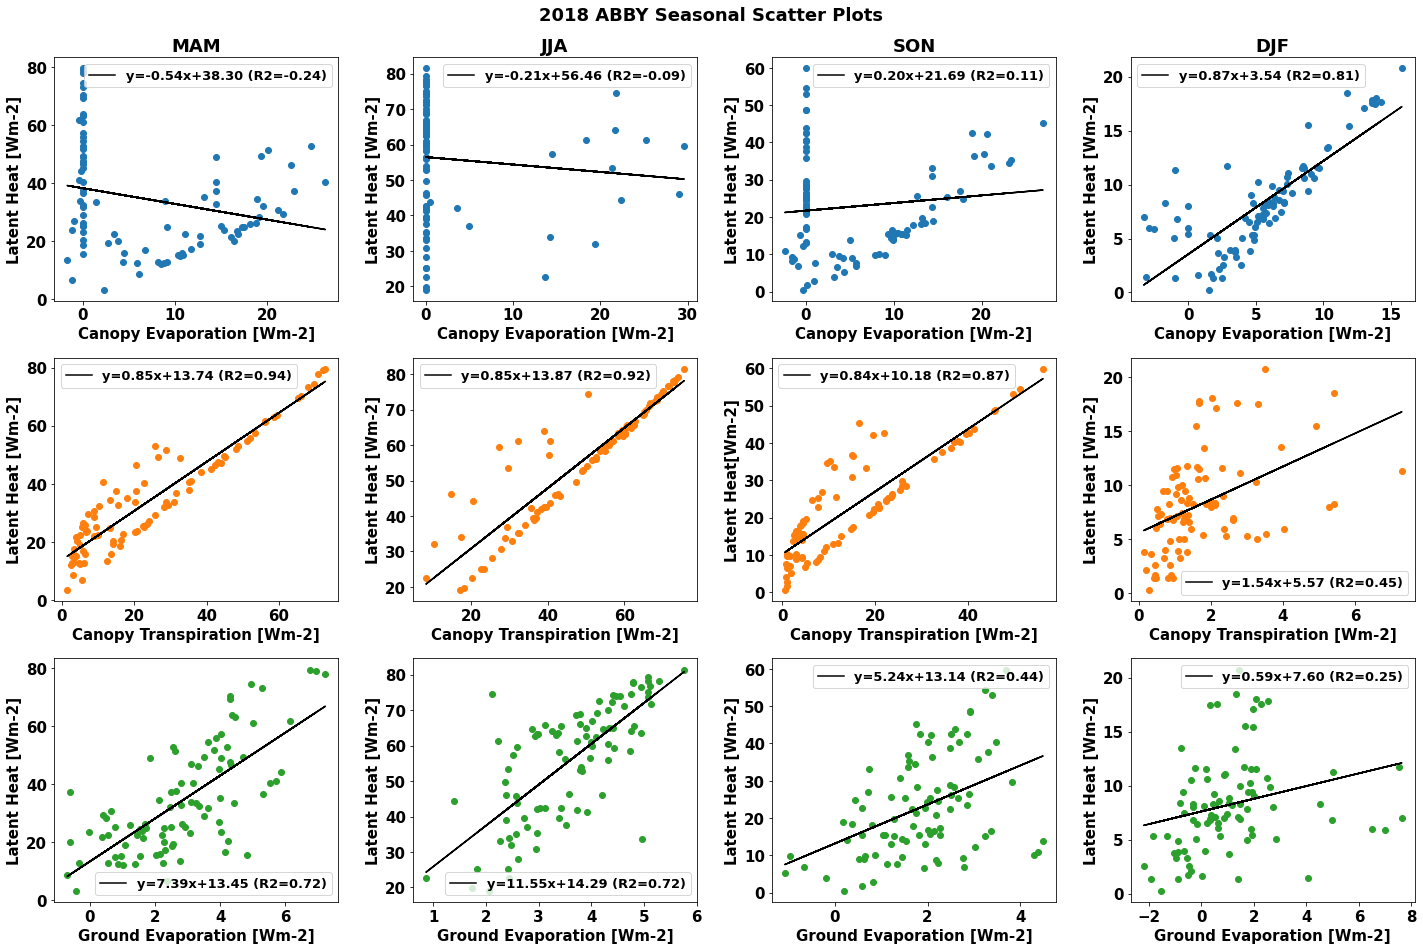

In [43]:

fig= plt.figure(num=None, figsize=(18,12),  facecolor='w', edgecolor='k')

season = 'MAM'
df_season =  df_daily[df_daily['season']==season]

plt.subplot(3, 4, 1)
detailed_scatter (df_season.sim_FCEV, df_season.sim_EFLX_LH_TOT, '#1f77b4')
plt.title(season, fontweight='bold')
plt.ylabel('Latent Heat [Wm-2]')
plt.xlabel('Canopy Evaporation [Wm-2]')

plt.subplot(3, 4, 5)
detailed_scatter (df_season.sim_FCTR, df_season.sim_EFLX_LH_TOT, '#ff7f0e')
plt.ylabel('Latent Heat [Wm-2]')
plt.xlabel('Canopy Transpiration [Wm-2]')


plt.subplot(3, 4, 9)
detailed_scatter (df_season.sim_FGEV, df_season.sim_EFLX_LH_TOT,'#2ca02c')
plt.ylabel('Latent Heat [Wm-2]')
plt.xlabel('Ground Evaporation [Wm-2]')


season = 'JJA'
df_season =  df_daily[df_daily['season']==season]

plt.subplot(3, 4, 2)
detailed_scatter (df_season.sim_FCEV, df_season.sim_EFLX_LH_TOT, '#1f77b4')
plt.title(season, fontweight='bold')
plt.ylabel('Latent Heat [Wm-2]')
plt.xlabel('Canopy Evaporation [Wm-2]')

plt.subplot(3, 4, 6)
detailed_scatter (df_season.sim_FCTR, df_season.sim_EFLX_LH_TOT, '#ff7f0e')
plt.ylabel('Latent Heat [Wm-2]')
plt.xlabel('Canopy Transpiration [Wm-2]')

plt.subplot(3, 4, 10)
detailed_scatter (df_season.sim_FGEV, df_season.sim_EFLX_LH_TOT,'#2ca02c')
plt.ylabel('Latent Heat [Wm-2]')
plt.xlabel('Ground Evaporation [Wm-2]')


season = 'SON'
df_season =  df_daily[df_daily['season']==season]

plt.subplot(3, 4, 3)
detailed_scatter (df_season.sim_FCEV, df_season.sim_EFLX_LH_TOT, '#1f77b4')
plt.title(season, fontweight='bold')
plt.ylabel('Latent Heat [Wm-2]')
plt.xlabel('Canopy Evaporation [Wm-2]')

plt.subplot(3, 4, 7)
detailed_scatter (df_season.sim_FCTR, df_season.sim_EFLX_LH_TOT, '#ff7f0e')
plt.ylabel('Latent Heat[Wm-2]')
plt.xlabel('Canopy Transpiration [Wm-2]')

plt.subplot(3, 4, 11)
detailed_scatter (df_season.sim_FGEV, df_season.sim_EFLX_LH_TOT,'#2ca02c')
plt.ylabel('Latent Heat [Wm-2]')
plt.xlabel('Ground Evaporation [Wm-2]')

season = 'DJF'
df_season =  df_daily[df_daily['season']==season]

plt.subplot(3, 4, 4)
detailed_scatter (df_season.sim_FCEV, df_season.sim_EFLX_LH_TOT, '#1f77b4')
plt.title(season, fontweight='bold')
plt.ylabel('Latent Heat [Wm-2]')
plt.xlabel('Canopy Evaporation [Wm-2]')

plt.subplot(3, 4, 8)
detailed_scatter (df_season.sim_FCTR, df_season.sim_EFLX_LH_TOT, '#ff7f0e')
plt.ylabel('Latent Heat [Wm-2]')
plt.xlabel('Canopy Transpiration [Wm-2]')

plt.subplot(3, 4, 12)
detailed_scatter (df_season.sim_FGEV, df_season.sim_EFLX_LH_TOT, '#2ca02c')
plt.ylabel('Latent Heat [Wm-2]')
plt.xlabel('Ground Evaporation [Wm-2]')

fig.suptitle(year+" "+neon_site+ " Seasonal Scatter Plots", fontweight='bold')
fig.tight_layout()

plt.show()

--------
Now, let's take a look at how latent heat flux changes during the day. For this we should take a look at the diurnal cycle of the plots. 

For this we need to calculate the average of the same hour from different days. 

In [44]:
diel_df_mean = df_all.groupby('hour').mean().reset_index()
diel_df_std = df_all.groupby('hour').std().reset_index()

diel_df_mean['EFLX_LH_TOT_bias'] = diel_df_mean['sim_EFLX_LH_TOT']- diel_df_mean['EFLX_LH_TOT']
print (diel_df_mean)

    hour       NEE         FSH  EFLX_LH_TOT  GPP    year     month        day  \
0      0  1.815238   29.557738    40.505909  NaN  2018.0  6.526027  15.720548   
1      1  2.203609    2.866012    24.175939  NaN  2018.0  6.526027  15.720548   
2      2  1.975095  -12.112236     8.932081  NaN  2018.0  6.526027  15.720548   
3      3  2.012189  -11.314763     2.574138  NaN  2018.0  6.526027  15.720548   
4      4  1.873744  -15.395945     2.737836  NaN  2018.0  6.526027  15.720548   
5      5  1.734073  -15.185342     1.762719  NaN  2018.0  6.526027  15.720548   
6      6  1.554918   -9.751429     1.993775  NaN  2018.0  6.526027  15.720548   
7      7  1.435843  -12.798954     2.302008  NaN  2018.0  6.526027  15.720548   
8      8  1.713782  -12.368266     2.065992  NaN  2018.0  6.526027  15.720548   
9      9  1.886060  -12.169049     2.806104  NaN  2018.0  6.526027  15.720548   
10    10  1.637926  -14.481544     2.900929  NaN  2018.0  6.526027  15.720548   
11    11  1.270304  -10.6541

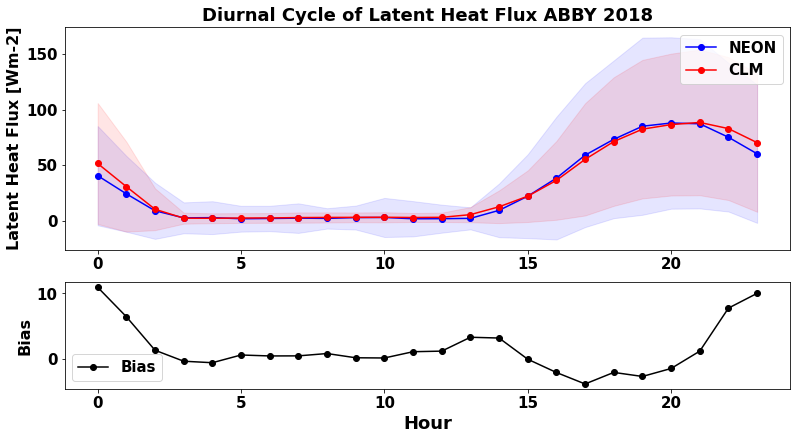

In [45]:
plt.figure(num=None, figsize=(13, 9),  facecolor='w', edgecolor='k')
        
plt.subplot(2, 1, 1)  
        
plt.plot ( diel_df_mean.hour, diel_df_mean['EFLX_LH_TOT'], marker = 'o' , color = 'b',label="NEON")
plt.plot ( diel_df_mean.hour, diel_df_mean['sim_EFLX_LH_TOT'], marker = 'o' , color = 'r',label="CLM")

plt.fill_between(diel_df_mean.hour, diel_df_mean.EFLX_LH_TOT-diel_df_std.EFLX_LH_TOT, diel_df_mean.EFLX_LH_TOT+diel_df_std.EFLX_LH_TOT ,alpha=0.1, color = 'b')
plt.fill_between(diel_df_mean.hour, diel_df_mean.sim_EFLX_LH_TOT-diel_df_std.sim_EFLX_LH_TOT, diel_df_mean.sim_EFLX_LH_TOT+diel_df_std.sim_EFLX_LH_TOT ,alpha=0.1, color = 'r')
plt.ylabel('Latent Heat Flux [Wm-2]', fontsize=16)

plt.title("Diurnal Cycle of Latent Heat Flux "+neon_site+" "+year, fontweight='bold')
plt.legend()
plt.subplot(4, 1, 3)  

ax = plt.gca()    
diel_df_mean.plot ( x= 'hour', y = 'EFLX_LH_TOT_bias' , marker = 'o' ,ax =ax , color = 'black',label='Bias')
plt.xlabel('Hour', fontsize=18)
plt.ylabel('Bias', fontsize=16)
plt.show()

In [46]:
diel_df_mean['sim_FCEV_perc']= diel_df_mean ['sim_FCEV']/(diel_df_mean ['sim_FCEV']+diel_df_mean ['sim_FCTR']+diel_df_mean ['sim_FGEV'])*100
diel_df_mean ['sim_FCTR_perc']= diel_df_mean ['sim_FCTR']/(diel_df_mean ['sim_FCEV']+diel_df_mean ['sim_FCTR']+diel_df_mean ['sim_FGEV'])*100
diel_df_mean ['sim_FGEV_perc']= diel_df_mean ['sim_FGEV']/(diel_df_mean ['sim_FCEV']+diel_df_mean ['sim_FCTR']+diel_df_mean ['sim_FGEV'])*100


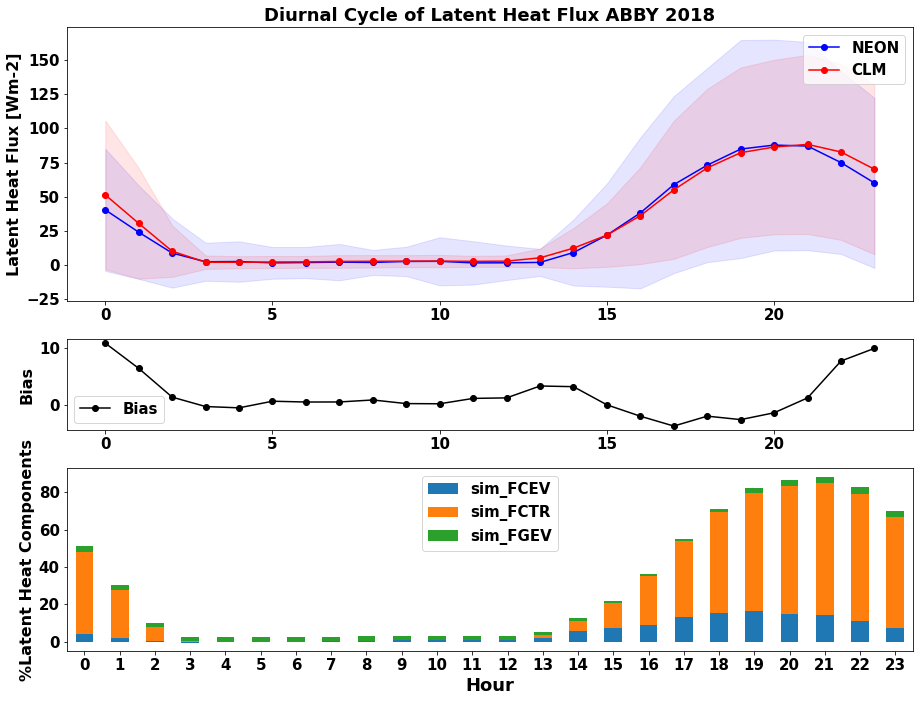

In [47]:
from matplotlib import gridspec

fig= plt.figure(num=None, figsize=(13, 10),  facecolor='w', edgecolor='k')

gs = gridspec.GridSpec(3, 1, height_ratios=[3, 1, 2]) 

ax0 = plt.subplot(gs[0])
        
ax0.plot ( diel_df_mean.hour, diel_df_mean['EFLX_LH_TOT'], marker = 'o' , color = 'b',label="NEON")
ax0.plot ( diel_df_mean.hour, diel_df_mean['sim_EFLX_LH_TOT'], marker = 'o' , color = 'r',label="CLM")

ax0.fill_between(diel_df_mean.hour, diel_df_mean.EFLX_LH_TOT-diel_df_std.EFLX_LH_TOT, diel_df_mean.EFLX_LH_TOT+diel_df_std.EFLX_LH_TOT ,alpha=0.1, color = 'b')
ax0.fill_between(diel_df_mean.hour, diel_df_mean.sim_EFLX_LH_TOT-diel_df_std.sim_EFLX_LH_TOT, diel_df_mean.sim_EFLX_LH_TOT+diel_df_std.sim_EFLX_LH_TOT ,alpha=0.1, color = 'r')
plt.ylabel('Latent Heat Flux [Wm-2]', fontsize=16)
plt.legend()
plt.title("Diurnal Cycle of Latent Heat Flux "+neon_site+" "+year, fontweight='bold')

ax1 = plt.subplot(gs[1])
diel_df_mean.plot ( x= 'hour', y = 'EFLX_LH_TOT_bias' , marker = 'o' ,ax =ax1 , color = 'black',label='Bias')
plt.xlabel('', fontsize=18)
plt.ylabel('Bias', fontsize=16)

ax2 = plt.subplot(gs[2])
diel_df_mean[['hour','sim_FCEV','sim_FCTR','sim_FGEV']].plot.bar ( x= 'hour',stacked='True',ax=ax2,rot=0)
plt.ylabel('%Latent Heat Components', fontsize=16)
plt.xlabel('Hour', fontsize=18)

plt.tight_layout()

fig.show()

**Question: How does different components of LH Flux contributes to the total latent heat flux during the day?**

___________________
## Soil Profiles:

Now, let's take a look at the soil profile ***** (Ask Danica)



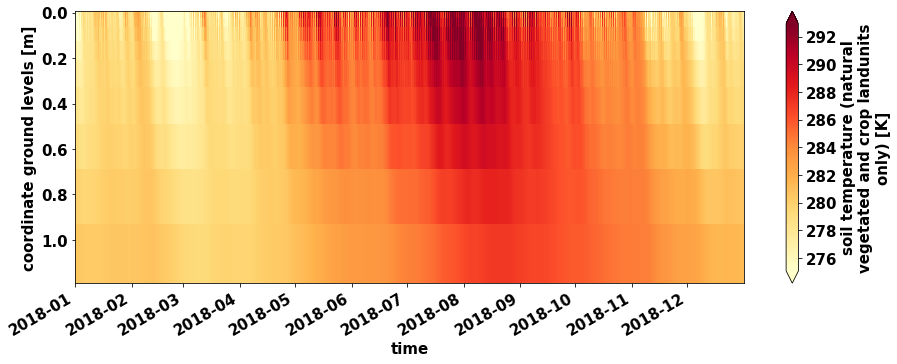

In [50]:
ds_ctsm.TSOI.isel(levgrnd=(slice(0,9))).plot(x="time",yincrease=False, robust=True,cmap='YlOrRd',figsize=(15, 5))


<br><br>Congratulations - you've walked through the basic steps of running a neon case and visualize it.  You're all set for some of the more advanced tutorials now. 